# Analyse des données de stationnement à Montpellier

**Présenté par :**  
Axel CABANES  
Gabriel LEFORT  

**Contexte :**  
Étude réalisée à partir des données Open Data de Montpellier Métropole
afin d’analyser l’usage des parkings voitures et vélos, ainsi que le
fonctionnement du relais multimodal.


## Méthodologie de recherche

Notre travail s’est déroulé en plusieurs étapes :

1. Récupération initiale des données Open Data
2. Identification de problèmes de qualité des données
3. Ajustement de la méthode et récupération de nouvelles données
4. Analyse finale sur un jeu de données fiabilisé


## Structure des données sources (version finale)

Les données exploitées dans la suite de l’étude sont fournies au format **JSON**
et étaient organisés de cette façon:

date:places_disponibles

Ces données ont été normalisées afin d’obtenir des taux comparables entre sites, nottament en trouvant le nombre total de place par parking/station de vélo.
Nous avons donc une semaine de donnée espacées de 10minutes chacunes


## Capteurs non fonctionnels (exemples)

Les premières observations évidentes que nous avons fait de cette collecte de données étaient que
certains parkings présentaient des valeurs constantes ou quasi constantes
sur toute la période d’observation, rendant l’analyse impossible.


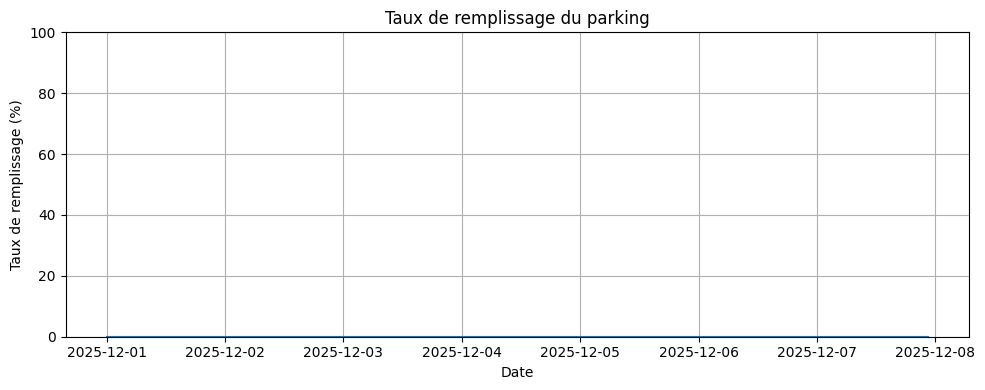

In [7]:
import json
from datetime import datetime
import matplotlib.pyplot as plt
nb_total = 285
fichier = "data-voitures/Sabines.json"

with open(fichier, "r", encoding="utf-8") as f:
    data = json.load(f)

dates = []
remplissage = []

for date_str, places_libres in data.items():
    date = datetime.strptime(date_str, "%Y-%m-%d %H:%M")
    taux = (1 - places_libres / nb_total) * 100

    taux = max(0, min(100, taux))

    dates.append(date)
    remplissage.append(taux)


plt.figure(figsize=(10, 4))
plt.plot(dates, remplissage)

plt.ylim(0, 100)
plt.xlabel("Date")
plt.ylabel("Taux de remplissage (%)")
plt.title("Taux de remplissage du parking")

plt.grid(True)
plt.tight_layout()
plt.show()


### Conséquence
Ces parkings ont été exclus de l’analyse finale.

## Analyse finale – Parkings voitures sous-dimensionnés

Sur le jeu de données final, certains parkings présentent
des périodes régulières de saturation.

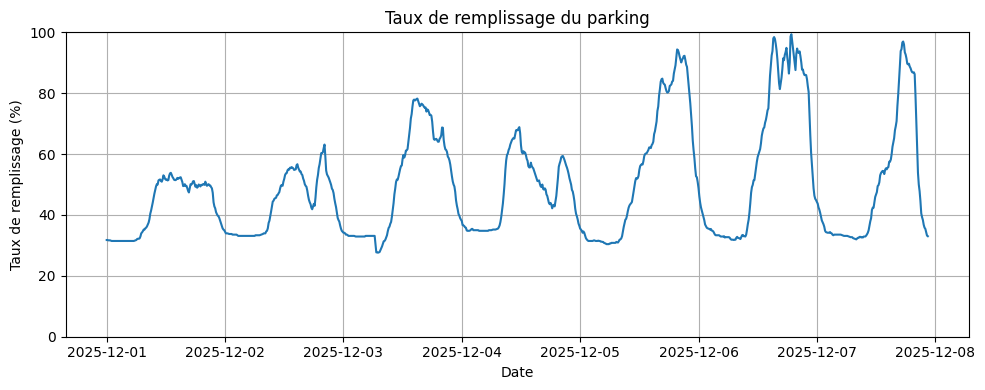

In [8]:
import json
from datetime import datetime
import matplotlib.pyplot as plt
nb_total = 480
fichier = "data-voitures/Corum.json"

with open(fichier, "r", encoding="utf-8") as f:
    data = json.load(f)

dates = []
remplissage = []

for date_str, places_libres in data.items():
    date = datetime.strptime(date_str, "%Y-%m-%d %H:%M")
    taux = (1 - places_libres / nb_total) * 100

    taux = max(0, min(100, taux))

    dates.append(date)
    remplissage.append(taux)


plt.figure(figsize=(10, 4))
plt.plot(dates, remplissage)

plt.ylim(0, 100)
plt.xlabel("Date")
plt.ylabel("Taux de remplissage (%)")
plt.title("Taux de remplissage du parking")

plt.grid(True)
plt.tight_layout()
plt.show()


## stations vélos sous-dimensionnées

Certaines stations vélos présentent aussi une disponibilité très faible
sur des périodes prolongées.


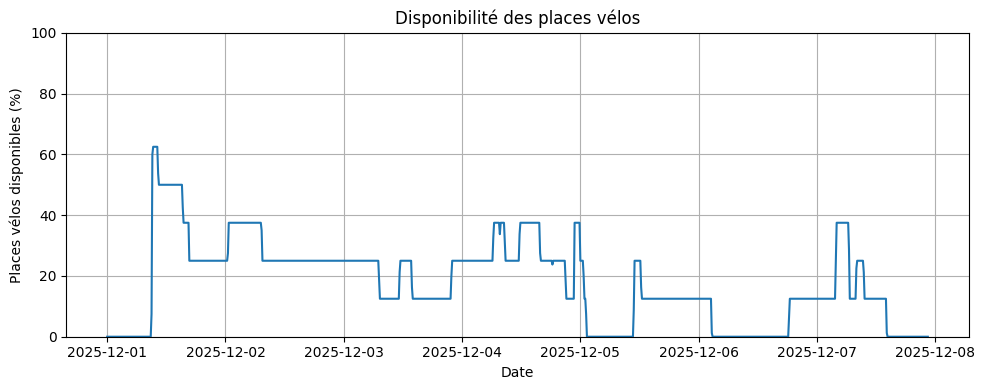

In [11]:
import json
from datetime import datetime
import matplotlib.pyplot as plt

# =====================
# PARAMÈTRES
# =====================
nb_total = 8        # <-- nombre total de bornes
fichier = "data-velos/Pont de Lattes - Gare Saint-Roch.json"


# =====================
# CHARGEMENT DES DONNÉES
# =====================
with open(fichier, "r", encoding="utf-8") as f:
    data = json.load(f)

dates = []
places_dispo_pct = []

for date_str, places_dispo in data.items():
    date = datetime.strptime(date_str, "%Y-%m-%d %H:%M")
    taux = (places_dispo / nb_total) * 100

    taux = max(0, min(100, taux))  # sécurité

    dates.append(date)
    places_dispo_pct.append(taux)


# =====================
# GRAPHE
# =====================
plt.figure(figsize=(10, 4))
plt.plot(dates, places_dispo_pct)

plt.ylim(0, 100)
plt.xlabel("Date")
plt.ylabel("Places vélos disponibles (%)")
plt.title("Disponibilité des places vélos")

plt.grid(True)
plt.tight_layout()
plt.show()



### Conclusion
Ces parkings/stations semblent sous-dimensionnés. Elles ne sont pas les seuls, c'est aussi le cas pour  d'autres parkings : (tout les graphes sont joints). 

**Parking voitures :**

- Arc de Triomphe 
- Comedie 
- Euromedecine 

**Stations vélos :**

- Charles Flahault
- Comedie
- Fac des Sciences
- Occitanie
- Gare saint Roch


Pour la majorité cela dit, ils n'atteignent pas ne serait-ce que 80% des places prises, les rendant donc tout à fait corrects. il y a même des parkings surdimensinnéss comme celui de la gare Mosson


## Corrélations spécifiques observées

En se concentrant sur des couples de parkings ciblés, trois situations distinctes apparaissent :

- Parkings proches avec corrélation
- Parkings éloignés avec corrélation
- Parkings proches sans corrélation

Malgré ces observations ciblées, la corrélation globale entre l’ensemble des parkings
reste élevée. Cette corrélation est principalement due à un facteur commun :
le **cycle jour / nuit**, qui influence fortement les usages et biaise
l’interprétation des corrélations globales


## Fonctionnement du relais multimodal – Interprétation

On peut déduire plusieurs éléments :

- Certains parkings fonctionnent de manière indépendante, sans lien avec
  d’autres parkings.
- D’autres sont en concurrence directe.
- Certains parkings sont liés malgré une distance importante entre eux ;
  cela s’explique par des trajets multimodaux du type  
  **voiture → tram → vélo**.
  

## Conclusion

L’analyse finale met en évidence :

- Des parkings, dans l’ensemble, bien dimensionnés
- Quelques exceptions de sousdimensionnement
- Des liens évidents entre certains parkings voitures et vélos
- La présence de données erronées ou de capteurs non fonctionnels, nécessitant
  la mise en place de solutions pour récupérer les données manquantes

Dans l’ensemble, les parkings sont correctement dimensionnés, malgré quelques cas
de sous- ou de surdimensionnement. Des liens évidents apparaissent entre les usages
des parkings voitures et vélos. Toutefois, la présence de données erronées ou de
capteurs défaillants limite l’analyse et souligne la nécessité de mettre en place des
solutions pour fiabiliser et compléter les données manquantes.